In [1]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import sys
sys.path.append("..")
from utils import *
import warnings
warnings.filterwarnings("ignore")

import lightgbm as lgb

In [2]:
''' Data Load '''
train, test = load_data()

''' Seed '''
seed_everything(42)

''' Data Load '''
train = preprocessing(train)
test = preprocessing(test, is_test = True)

---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:33<00:00,  1.31s/it]


---------------- Start Category ----------------


100%|██████████| 6/6 [06:19<00:00, 63.31s/it]


---------------- Change Dtype ----------------
---------------- Start MissingValue ----------------


100%|██████████| 26/26 [00:05<00:00,  5.19it/s]


---------------- Start Category ----------------


100%|██████████| 6/6 [00:57<00:00,  9.57s/it]


---------------- Change Dtype ----------------


In [3]:
# 실험 1
''' K-Fold '''
X_train = train.drop(columns=['Click'])
y_train = train['Click']
lgbm = lgb.LGBMClassifier(objective='binary')
pred_list, Score_list, k = Kfold(lgbm, 3, X_train, y_train)
pred = sum(pred_list)/k

---------------- 1 fold의 Acc: 0.7634535799172689 ----------------
---------------- 2 fold의 Acc: 0.7627118430954848 ----------------
---------------- 3 fold의 Acc: 0.7627962932995592 ----------------
---------------- Aver Acc: 0.762987238770771 ----------------


ValueError: operands could not be broadcast together with shapes (9535131,2) (9535130,2) 

In [4]:
# 실험 2 F01 카테고리(5 under)
''' K-Fold '''
X_train = train.drop(columns=['Click'])
y_train = train['Click']
lgbm = lgb.LGBMClassifier(objective='binary')
pred_list, Score_list, k = Kfold(lgbm, 3, X_train, y_train)

---------------- 1 fold의 Acc: 0.7634894029807717 ----------------
---------------- 2 fold의 Acc: 0.7628595988535454 ----------------
---------------- 3 fold의 Acc: 0.7628177795916435 ----------------
---------------- Aver Acc: 0.7630555938086535 ----------------


In [3]:
# 실험 2 F01 카테고리(100 under)
''' K-Fold '''
X_train = train.drop(columns=['Click'])
y_train = train['Click']
lgbm = lgb.LGBMClassifier(objective='binary')
pred_list, Score_list, k = Kfold(lgbm, 3, X_train, y_train)

---------------- 1 fold의 Acc: 0.7629356434127573 ----------------
---------------- 2 fold의 Acc: 0.7627710371956155 ----------------
---------------- 3 fold의 Acc: 0.7629249862932903 ----------------
---------------- Aver Acc: 0.7628772223005544 ----------------


In [3]:
# 실험 3 여러 카테고리
''' K-Fold '''
X_train = train.drop(columns=['Click'])
y_train = train['Click']
lgbm = lgb.LGBMClassifier(objective='binary')
pred_list, Score_list, k = Kfold(lgbm, 3, X_train, y_train)

---------------- 1 fold의 Acc: 0.7634894029807717 ----------------
---------------- 2 fold의 Acc: 0.7628595988535454 ----------------
---------------- 3 fold의 Acc: 0.7628177795916435 ----------------
---------------- Aver Acc: 0.7630555938086535 ----------------


<Axes: title={'center': 'Top 20 features'}>

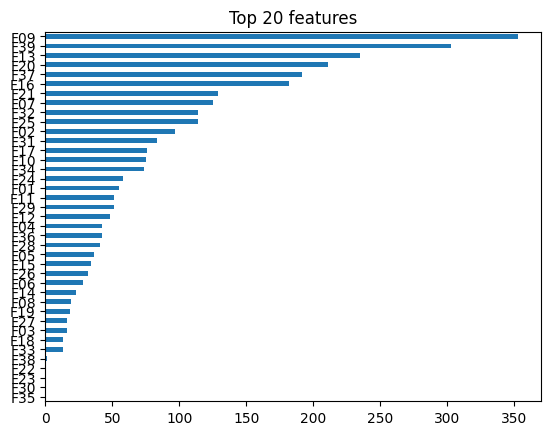

In [5]:
importances = pd.Series(lgbm.feature_importances_, X_train.columns)
import matplotlib.pyplot as plt

n=20
plt.title(f'Top {n} features')
importances.sort_values().plot.barh()

In [4]:
# 실험 LabelEncoder 
cat_col = list(train.select_dtypes(include='category').columns)
for i in cat_col:
    le = LabelEncoder()
    le.fit(train[i])
    train[i] = le.transform(train[i])
    
    for case in np.unique(test[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case)
    
    test[i] = le.transform(test[i])

  0%|          | 0/25 [00:06<?, ?it/s]


ValueError: y contains previously unseen labels: 'SRJNHVT'

In [6]:
# 실험 TargetEncoder 
cat_col = list(train.select_dtypes(include='category').columns)
X_train = train.drop(columns=['Click'])
y_train = train['Click']

In [11]:
''' Category encoder '''
for col in cat_col:
    encoder =  TargetEncoder()
    X_train[col] = encoder.fit_transform(X_train[col], y_train)
    test[cat_col] = encoder.transform(test[cat_col])


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
''' Model Fit & K-Fold '''
lgbm = lgb.LGBMClassifier(objective='binary')
pred_list, Score_list, k = Kfold(lgbm, 3, X_train, y_train)

In [ ]:
''' Submission '''
sample_submission = pd.read_csv('/home/workspace/DACON/Click_predict/data/sample_submission.csv')
sample_submission['Click'] = pred
sample_submission.to_csv('lgbm_predict_proba.csv', index=False)